In [18]:
# imports
import numpy as np

from commstools import set_backend
from commstools.channel import add_gaussian_noise
from commstools.filtering import rrc_taps
from commstools.plotting import filter_response, ideal_constellation
from commstools.waveforms import qam_waveform

set_backend("gpu")


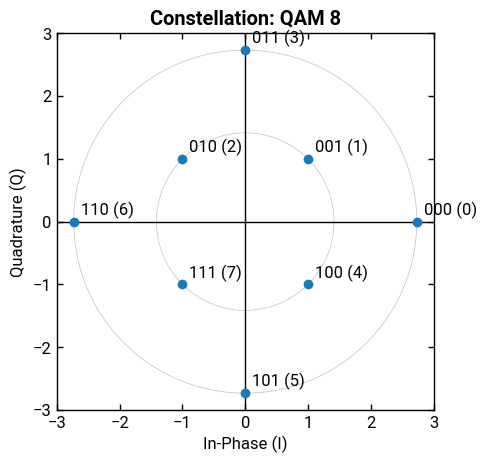

In [20]:
ideal_constellation(modulation="qam", order=8, show=True)


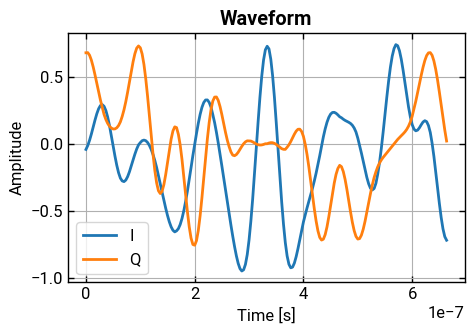

In [37]:
symbol_rate = 30e6
sampling_rate = 300e6
sps = int(sampling_rate / symbol_rate)

sig_4qam = qam_waveform(
    order=8,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=42,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)


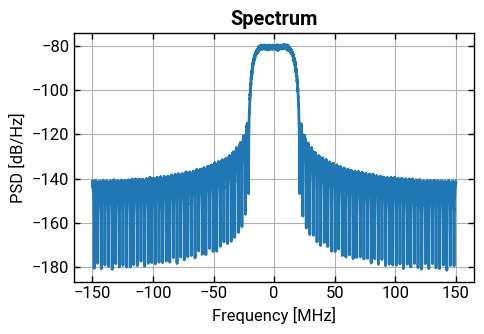

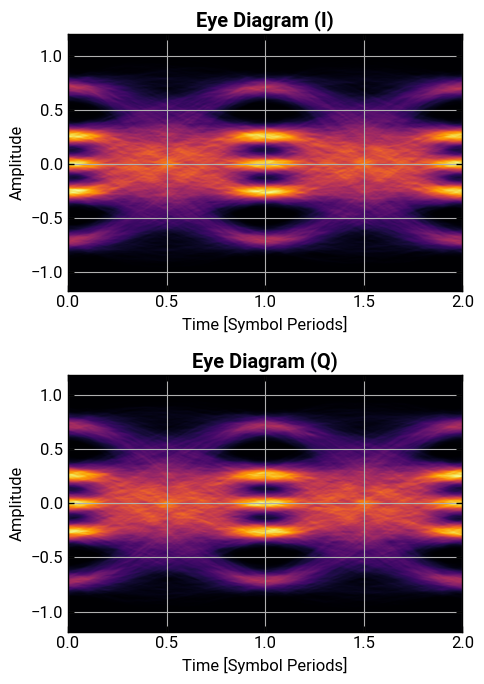

In [ ]:
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_eye(show=True)


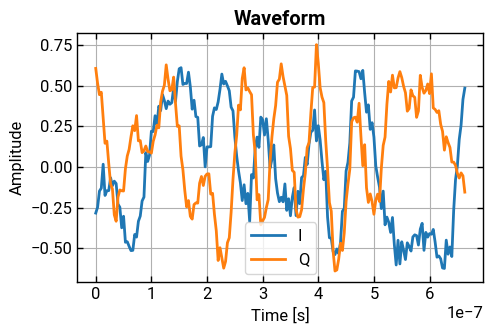

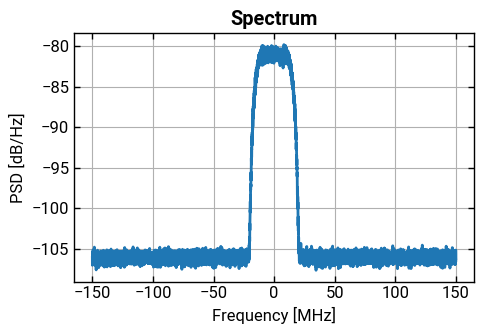

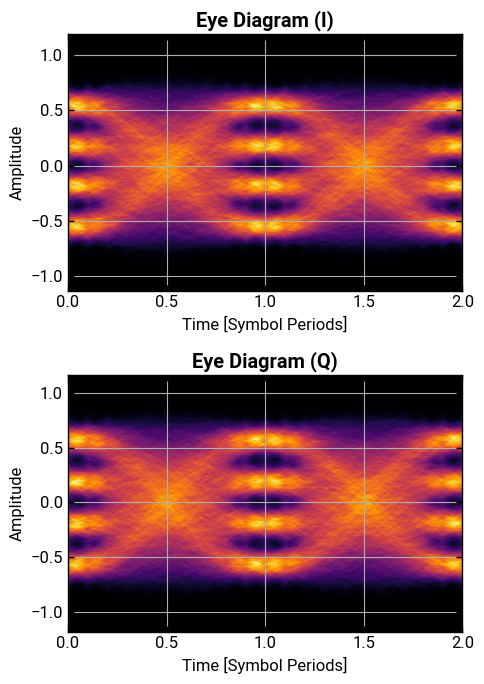

In [12]:
sig_4qam_n = add_gaussian_noise(sig_4qam, snr_db=15)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_eye(show=True)


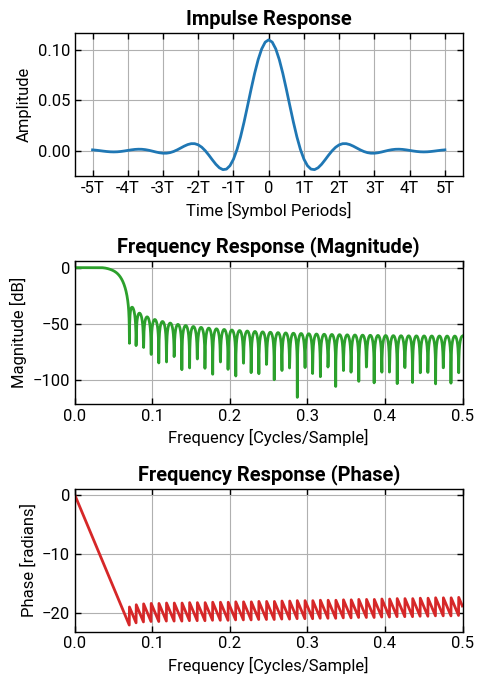

In [13]:
rrc_filter = rrc_taps(sps=sps, rolloff=0.35, span=10)
filter_response(rrc_filter, sps=sps, show=True)


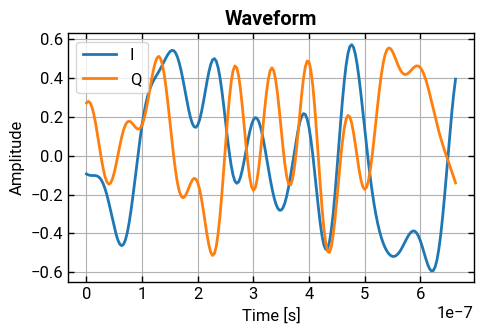

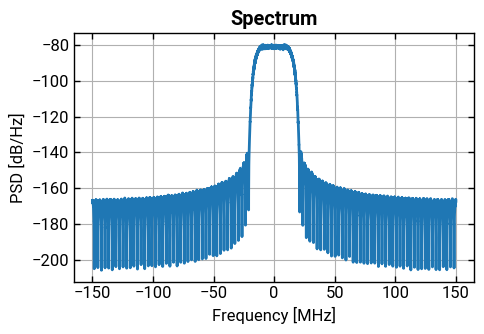

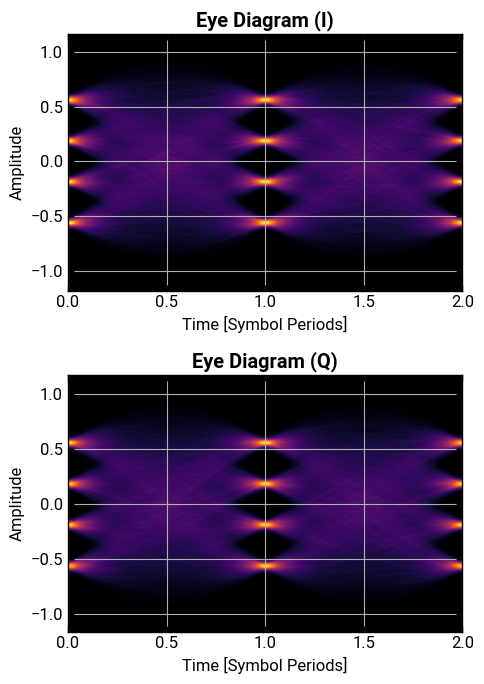

In [ ]:
sig_4qam_n.matched_filter(pulse_taps=rrc_filter)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_eye(show=True)


In [32]:
from commstools.mapping import gray_constellation

gray_constellation(modulation="qam", order=16)


array([-3.-3.j, -3.-1.j, -3.+3.j, -3.+1.j, -1.-3.j, -1.-1.j, -1.+3.j,
       -1.+1.j,  3.-3.j,  3.-1.j,  3.+3.j,  3.+1.j,  1.-3.j,  1.-1.j,
        1.+3.j,  1.+1.j])